<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Beatifulsoup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup

c:\Users\Sara Rostami.D\.conda\envs\base2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Sara Rostami.D\.conda\envs\base2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\Sara Rostami.D\.conda\envs\base2\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


## News Crawler
News Information:
- Title
- Description
- datetime
- Category
- Agency

In [19]:
# parse news list page
gold_news = []
currency_news = []
# there are 20 news on each page, so we need to crawl at least 25 pages -> I crawled 35 pages and got 700 news for each group
for i in range(35):
    url = f'https://www.tgju.org/news/category/93964/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%B7%D9%84%D8%A7-%D9%88-%D8%B3%DA%A9%D9%87/page/{i}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    gold_news.append(soup.find("div", {"id": "news-list-inner"}))

for i in range(35):
    url = f'https://www.tgju.org/news/category/93965/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%A7%D8%B1%D8%B2%DB%8C/page/{i}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    currency_news.append(soup.find("div", {"id": "news-list-inner"}))

### Currency News Crawler

In [22]:
# crawl data + save into csv file
category = []
agency = []
title = []
datetime = []
description = []
for i in range(35):
    rows = currency_news[i].find_all('div' ,{"class","news-article-block"})

    for row in rows:
        content = row.find('div', {"class","news-article-min-content"})
        category.append(content.find('a').text)
        x = content.find('span' , {"class","news-article-tag"})
        if x == None:
            agency.append(content.find('a' , {"class","news-article-tag news-article-tag"}).text)
        else:
            agency.append(x.text)
        h = content.find('h2').text
        h = h.strip()
        h = h.replace("\n", '')
        h = h.replace("t", '')
        title.append(h)

        u = content.find('span' , {"class","news-article-description"}).text
        u = u.strip()
        u = u.replace("\n", '')
        hu= u.replace("t", '')
        description.append(u)

        datetime.append(content.find('time')['datetime'])

dic = {'title': title, 'description': description, 'datetime': datetime , 'category': category , 'agency': agency}
currency_df = pd.DataFrame( dic , columns=['title','description','datetime','category','agency'])
currency_df

,title,description,datetime,category,agency
0,یک دلار هزینه برای کاهش بلایای طبیعی، هفت دلار...,در نشست علمی تخصصی مطرح شد: لزوم توجه برنامه ه...,2022-10-26 21:11:30,اخبار ارزی,خبرگزاری دانشجو
1,افزایش میزان جذب سرمایه‌گذاری خارجی به ۵ میلیا...,معاون وزیر امور اقتصادی و دارایی و رئیس کل ساز...,2022-10-26 20:11:37,اخبار ارزی,خبرگزاری دانشجو
2,آرامش در بازار ارز برقرار است/ 66 درصد تسهیلات...,رئیس‌کل بانک مرکزی با اشاره به افزایش حجم معام...,2022-10-26 17:51:33,اخبار ارزی,فارس
3,قیمت لحظه‌ای دلار و یورو در بازار | ثبات دلار ...,نرخ دلار در بازار توافقی بین صراف و صادرکننده،...,2022-10-26 17:51:31,اخبار ارزی,نبض بورس
4,نرخ‌های بالایی برای جام جهانی پیش‌بینی نشده است,,2022-10-26 17:46:15,اخبار ارزی,جام جم آنلاین
...,...,...,...,...,...
695,طراحی رابط کاربری One UI سامسونگ نیاز به تغییر...,,2022-10-13 22:26:15,اخبار ارزی,دیجی کالا مگ
696,سربازان آمریکایی از هدست‌های واقعیت افزوده‌ی م...,,2022-10-13 21:32:00,اخبار ارزی,دیجی کالا مگ
697,آنر ۸۰ پرو پلاس با دوربین ۲۰۰ مگاپیکسلی راهی ب...,,2022-10-13 19:51:36,اخبار ارزی,دیجی کالا مگ
698,اولین واکنش قیمت دلار به تحریم ظریف و لاریجانی,قیمت دلار در معاملات نقدی امروز ۲۱ مهر ماه در ...,2022-10-13 19:31:57,اخبار ارزی,اقتصاد نیوز


In [25]:
# saving the .csv file for currency news
currency_df.to_csv('currency_news.csv',index = False)

### Gold News Crawler

In [27]:
# crawl data + save into csv file
category = []
agency = []
title = []
datetime = []
description = []
for i in range(35):
    rows = gold_news[i].find_all('div' ,{"class","news-article-block"})

    for row in rows:
        content = row.find('div', {"class","news-article-min-content"})
        category.append(content.find('a').text)
        x = content.find('span' , {"class","news-article-tag"})
        if x == None:
            agency.append(content.find('a' , {"class","news-article-tag news-article-tag"}).text)
        else:
            agency.append(x.text)
        h = content.find('h2').text
        h = h.strip()
        h = h.replace("\n", '')
        h = h.replace("t", '')
        title.append(h)

        u = content.find('span' , {"class","news-article-description"}).text
        u = u.strip()
        u = u.replace("\n", '')
        hu= u.replace("t", '')
        description.append(u)

        datetime.append(content.find('time')['datetime'])

dic = {'title': title, 'description': description, 'datetime': datetime , 'category': category , 'agency': agency}
gold_df = pd.DataFrame( dic , columns=['title','description','datetime','category','agency'])
gold_df

,title,description,datetime,category,agency
0,پیش بینی قیمت طلا و سکه فردا ۵ آبان ۱۴۰۱,امروز هر گرم طلا ۱۸ عیار مانند روز قبل رشد قیم...,2022-10-26 19:26:35,اخبار طلا و سکه,نبض بازار
1,گزارش بازار‌ها امروز ۴ مهر ۱۴۰۱ | کاهش تقاضا ب...,به صورت روزانه نبض بورس وضعیت بازار‌های موازی ...,2022-10-26 19:11:32,اخبار طلا و سکه,نبض بورس
2,واردات ست نقره انگشتر به ایران افزایش یافت,به دلیل ارزشمند بودن نقره، اشیای قیمتی از این ...,2022-10-26 16:31:39,اخبار طلا و سکه,تابناک
3,9 موردی کوچک که شما را دوست داشتنی تر می کند,ما در سایت طلا، نشانه های کوچکی که شما را دوست...,2022-10-26 15:31:42,اخبار طلا و سکه,سایت طلا
4,قیمت طلا و انواع آبشده در معاملات امروز ۴ آبان...,قیمت هر گرم طلای ۲۴ عیار با افزایش ۰.۷۸ درصدی،...,2022-10-26 15:16:26,اخبار طلا و سکه,نبض بازار
...,...,...,...,...,...
695,قیمت سکه ریخت,گزارش‌ها از بازار سکه نشان می‌دهد که در طول یک...,2022-09-24 09:51:47,اخبار طلا و سکه,اقتصاد 24
696,سکه بازان در موقعیت فروش / قیمت طلا نزولی شد,در معاملات پشت خطی دیروز تقاضا برای دلار کاش پ...,2022-09-24 09:46:28,اخبار طلا و سکه,سایت طلا
697,سقوط آزاد قیمت طلا,قیمت هر اونس طلا امروز با ۱.۶۳ درصد کاهش به ۱۶...,2022-09-24 09:26:00,اخبار طلا و سکه,اقتصاد آنلاین
698,وضعیت حباب در بازار سکه امروز ۲ مهر ۱۴۰۱ چگونه...,در جدول زیر وضعیت حباب انواع سکه (امامی، بهار ...,2022-09-24 09:11:41,اخبار طلا و سکه,نبض بازار


In [29]:
# saving the .csv file for currency news
gold_df.to_csv('gold_news.csv',index = False)

## Question 1: Top Agency

In [42]:
curr_agency = currency_df['agency'].value_counts()[:5].index.to_list()
gold_agency = gold_df['agency'].value_counts()[:5].index.to_list()
print('<< 5 news agencies with the most number of currency news >>')
for i,x in enumerate(curr_agency):
    print(f"{i+1}. {x}")
print('<< 5 news agencies with the most number of gold and coin news >>')
for i,x in enumerate(gold_agency):
    print(f"{i+1}. {x}")

<< 5 news agencies with the most number of currency news >>
1. اقتصاد نیوز
2. دنیای اقتصاد
3. ایران اکونومیست
4. دیجی کالا مگ
5. اقتصاد 24
<< 5 news agencies with the most number of gold and coin news >>
1. نبض بازار
2. سایت طلا
3. اقتصاد نیوز
4. اقتصاد آنلاین
5. اخبار ویژه


## Question 2: Daily News Trend

In [66]:
# sorting the rows based on "date" column & adding the "date" column
currency_df = currency_df.sort_values(by ='datetime',ignore_index=True)
currency_df['date'] = currency_df['datetime'].str[:10]
currency_df

,title,description,datetime,category,agency,date
0,قیمت طلا و سکه در بازار بالا رفت,اقتصاد نیوز : برخی از تحلیلگران معتقد بودند در...,2022-10-13 19:16:16,اخبار ارزی,دنیای اقتصاد,2022-10-13
1,اولین واکنش قیمت دلار به تحریم ظریف و لاریجانی,قیمت دلار در معاملات نقدی امروز ۲۱ مهر ماه در ...,2022-10-13 19:31:57,اخبار ارزی,اقتصاد نیوز,2022-10-13
2,آنر ۸۰ پرو پلاس با دوربین ۲۰۰ مگاپیکسلی راهی ب...,,2022-10-13 19:51:36,اخبار ارزی,دیجی کالا مگ,2022-10-13
3,سربازان آمریکایی از هدست‌های واقعیت افزوده‌ی م...,,2022-10-13 21:32:00,اخبار ارزی,دیجی کالا مگ,2022-10-13
4,طراحی رابط کاربری One UI سامسونگ نیاز به تغییر...,,2022-10-13 22:26:15,اخبار ارزی,دیجی کالا مگ,2022-10-13
...,...,...,...,...,...,...
695,آرامش در بازار ارز برقرار است/ 66 درصد تسهیلات...,رئیس‌کل بانک مرکزی با اشاره به افزایش حجم معام...,2022-10-26 17:51:33,اخبار ارزی,فارس,2022-10-26
696,افزایش میزان جذب سرمایه‌گذاری خارجی به ۵ میلیا...,معاون وزیر امور اقتصادی و دارایی و رئیس کل ساز...,2022-10-26 20:11:37,اخبار ارزی,خبرگزاری دانشجو,2022-10-26
697,افزایش میزان جذب سرمایه‌گذاری خارجی به ۵ میلیا...,معاون وزیر امور اقتصادی و دارایی و رئیس کل ساز...,2022-10-26 20:11:37,اخبار ارزی,خبرگزاری دانشجو,2022-10-26
698,یک دلار هزینه برای کاهش بلایای طبیعی، هفت دلار...,در نشست علمی تخصصی مطرح شد: لزوم توجه برنامه ه...,2022-10-26 21:11:30,اخبار ارزی,خبرگزاری دانشجو,2022-10-26


In [67]:
# sorting the rows based on "datetime" column & adding the "date" column
gold_df = gold_df.sort_values(by ='datetime',ignore_index=True)
gold_df['date'] = gold_df['datetime'].str[:10]
gold_df

,title,description,datetime,category,agency,date
0,قیمت روز انواع سکه پارسیان در معاملات امروز ۲ ...,در جدول زیر جدیدترین قیمت سکه پارسیان در انواع...,2022-09-24 08:46:15,اخبار طلا و سکه,نبض بازار,2022-09-24
1,وضعیت حباب در بازار سکه امروز ۲ مهر ۱۴۰۱ چگونه...,در جدول زیر وضعیت حباب انواع سکه (امامی، بهار ...,2022-09-24 09:11:41,اخبار طلا و سکه,نبض بازار,2022-09-24
2,سقوط آزاد قیمت طلا,قیمت هر اونس طلا امروز با ۱.۶۳ درصد کاهش به ۱۶...,2022-09-24 09:26:00,اخبار طلا و سکه,اقتصاد آنلاین,2022-09-24
3,سکه بازان در موقعیت فروش / قیمت طلا نزولی شد,در معاملات پشت خطی دیروز تقاضا برای دلار کاش پ...,2022-09-24 09:46:28,اخبار طلا و سکه,سایت طلا,2022-09-24
4,قیمت سکه ریخت,گزارش‌ها از بازار سکه نشان می‌دهد که در طول یک...,2022-09-24 09:51:47,اخبار طلا و سکه,اقتصاد 24,2022-09-24
...,...,...,...,...,...,...
695,واردات ست نقره انگشتر به ایران افزایش یافت,به دلیل ارزشمند بودن نقره، اشیای قیمتی از این ...,2022-10-26 16:31:39,اخبار طلا و سکه,تابناک,2022-10-26
696,گزارش بازار‌ها امروز ۴ مهر ۱۴۰۱ | کاهش تقاضا ب...,به صورت روزانه نبض بورس وضعیت بازار‌های موازی ...,2022-10-26 19:11:32,اخبار طلا و سکه,نبض بورس,2022-10-26
697,گزارش بازار‌ها امروز ۴ مهر ۱۴۰۱ | کاهش تقاضا ب...,به صورت روزانه نبض بورس وضعیت بازار‌های موازی ...,2022-10-26 19:11:32,اخبار طلا و سکه,نبض بورس,2022-10-26
698,پیش بینی قیمت طلا و سکه فردا ۵ آبان ۱۴۰۱,امروز هر گرم طلا ۱۸ عیار مانند روز قبل رشد قیم...,2022-10-26 19:26:35,اخبار طلا و سکه,نبض بازار,2022-10-26


In [68]:
gold_df['news_count_per_day'] =  gold_df.groupby('date')['date'].transform('count')
currency_df['news_count_per_day'] =  currency_df.groupby('date')['date'].transform('count')

In [80]:
gold_res = gold_df[['date','news_count_per_day']]
gold_res = gold_res.drop_duplicates().reset_index()
curr_res = currency_df[['date','news_count_per_day']]
curr_res = curr_res.drop_duplicates().reset_index()

Text(0, 0.5, 'count of news')

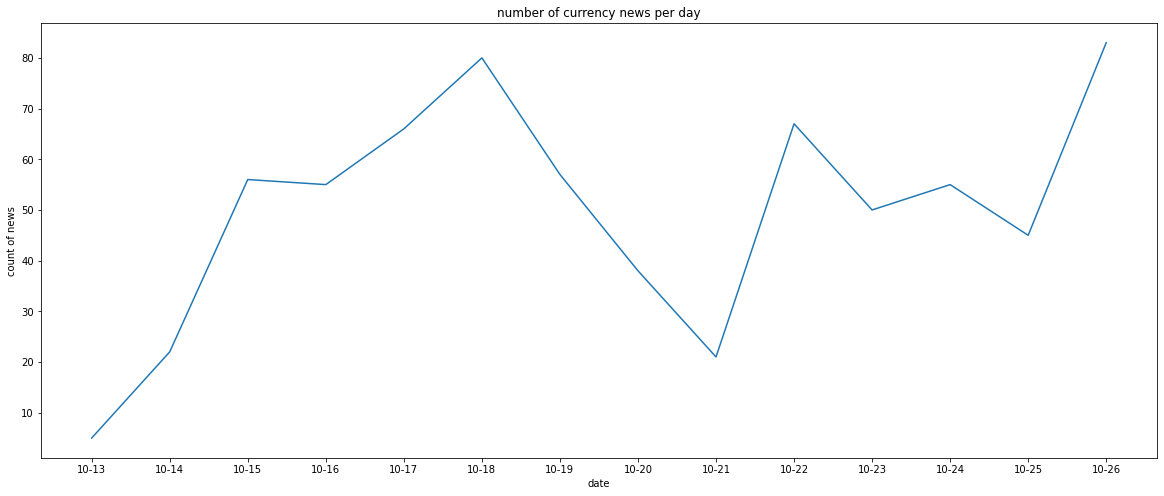

In [89]:
# plotting
plt.figure(figsize=(20,8))
plt.plot(curr_res['date'].str[5:],curr_res['news_count_per_day'])
plt.title("number of currency news per day")
plt.xlabel("date")
plt.ylabel("count of news")

Text(0, 0.5, 'count of news')

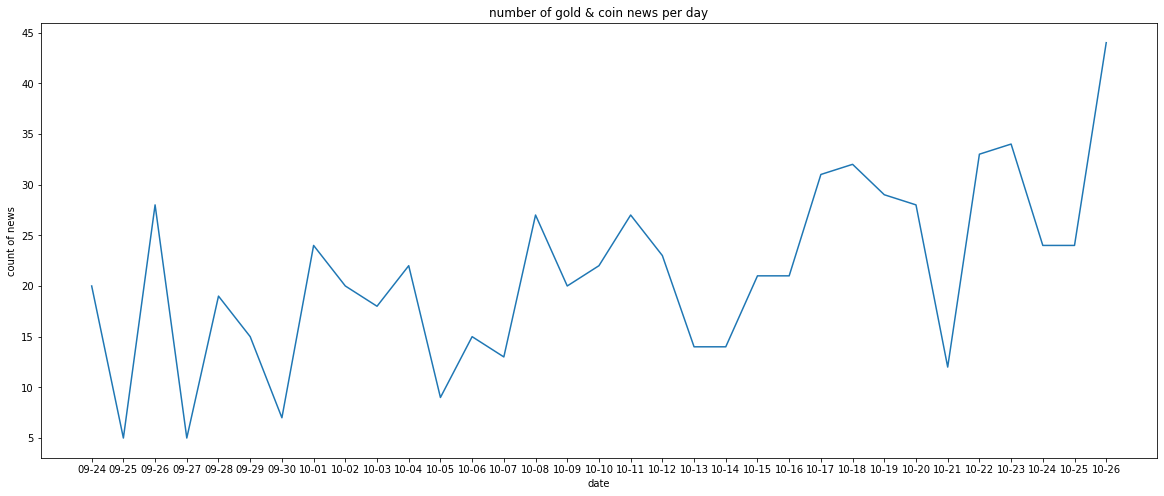

In [90]:
plt.figure(figsize=(20,8))
plt.plot(gold_res['date'].str[5:],gold_res['news_count_per_day'])
plt.title("number of gold & coin news per day")
plt.xlabel("date")
plt.ylabel("count of news")